In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
import scipy.stats as stats
warnings.filterwarnings('ignore')

studentPerformance = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv").reset_index()

display(studentPerformance)
print('*'*125)
states.info()
print('*'*75)
print(states.isnull().sum())

'''
Verimizde kayıp veri bulunmadığı için veri doldurma işlemi yapmayacağız. 
Şimdi işimize yarayacak olan veriler için kayıp değerler var mı diye kontrol edelim.
'''

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


*****************************************************************************************************************************


NameError: name 'states' is not defined

In [152]:
print(studentPerformance.describe(include="all"))

                      index  gender race/ethnicity  \
count  1000.000000000000000    1000           1000   
unique                  nan       2              5   
top                     nan  female        group C   
freq                    nan     518            319   
mean    499.500000000000000     NaN            NaN   
std     288.819436095749381     NaN            NaN   
min       0.000000000000000     NaN            NaN   
25%     249.750000000000000     NaN            NaN   
50%     499.500000000000000     NaN            NaN   
75%     749.250000000000000     NaN            NaN   
max     999.000000000000000     NaN            NaN   

       parental level of education     lunch test preparation course  \
count                         1000      1000                    1000   
unique                           6         2                       2   
top                   some college  standard                    none   
freq                           226       645                   

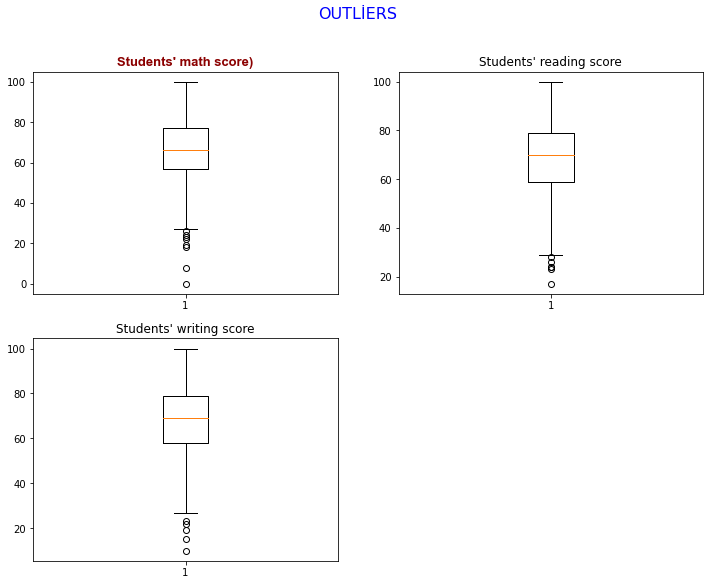

In [153]:
"""
Grafiklere göre sadece alt limitlerde aykırı değerler var. 
"""

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.boxplot(studentPerformance["math score"])
plt.title("Students' math score)", fontdict=title_font)

plt.subplot(2,2,2)
plt.boxplot(studentPerformance["reading score"])
plt.title("Students' reading score")

plt.subplot(2,2,3)
plt.boxplot(studentPerformance["writing score"])
plt.title("Students' writing score")
plt.suptitle("OUTLİERS",fontsize = 16, color= "Blue")

plt.show()





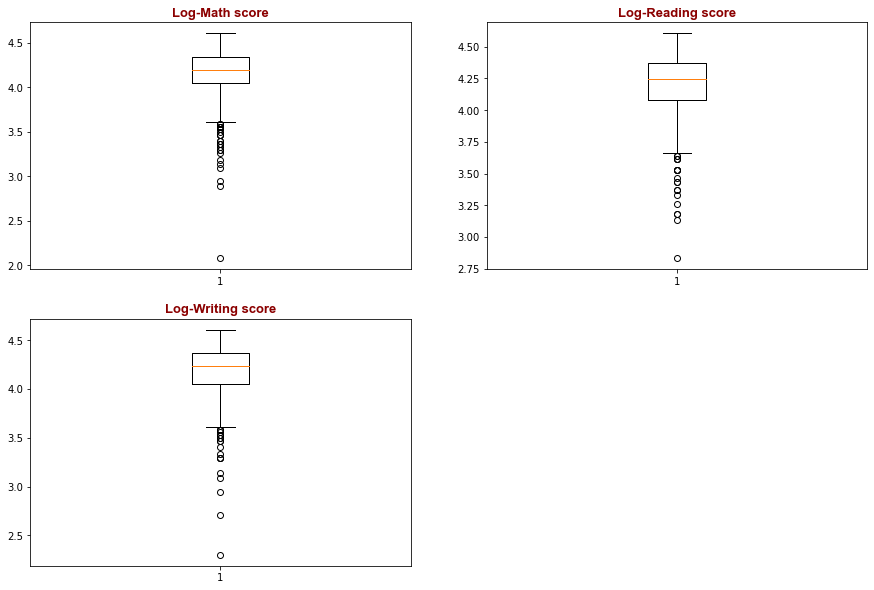

Threshold value: 1
Number of Outliers: 154
------
Threshold value: 2
Number of Outliers: 19
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [154]:
"""
Logaritmasını alarak değerler daha çok aykırı değerlere sahip olduğu için, aynı zamanda çok fazla ayrkırı değer olmadığı
için değerleri olduğu gibi bırakmaya karar verdim. 
Aynı zamanda 1 tanesini baz alarak z skoruna bakarak aykırı değerlerin miktarların çok fazla olmadığı kanaatine vardım.
"""


plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.boxplot(np.log(studentPerformance["math score"]))
plt.title("Log-Math score", fontdict=title_font)

plt.subplot(2,2,2)
plt.boxplot(np.log(studentPerformance["reading score"]))
plt.title("Log-Reading score", fontdict=title_font)

plt.subplot(2,2,3)
plt.boxplot(np.log(studentPerformance["writing score"]))
plt.title("Log-Writing score", fontdict=title_font)


plt.show()

from scipy.stats import zscore

z_scores = zscore(studentPerformance["math score"])
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

1-Does the performance in the exams vary according to gender, origin and education level of parents? 

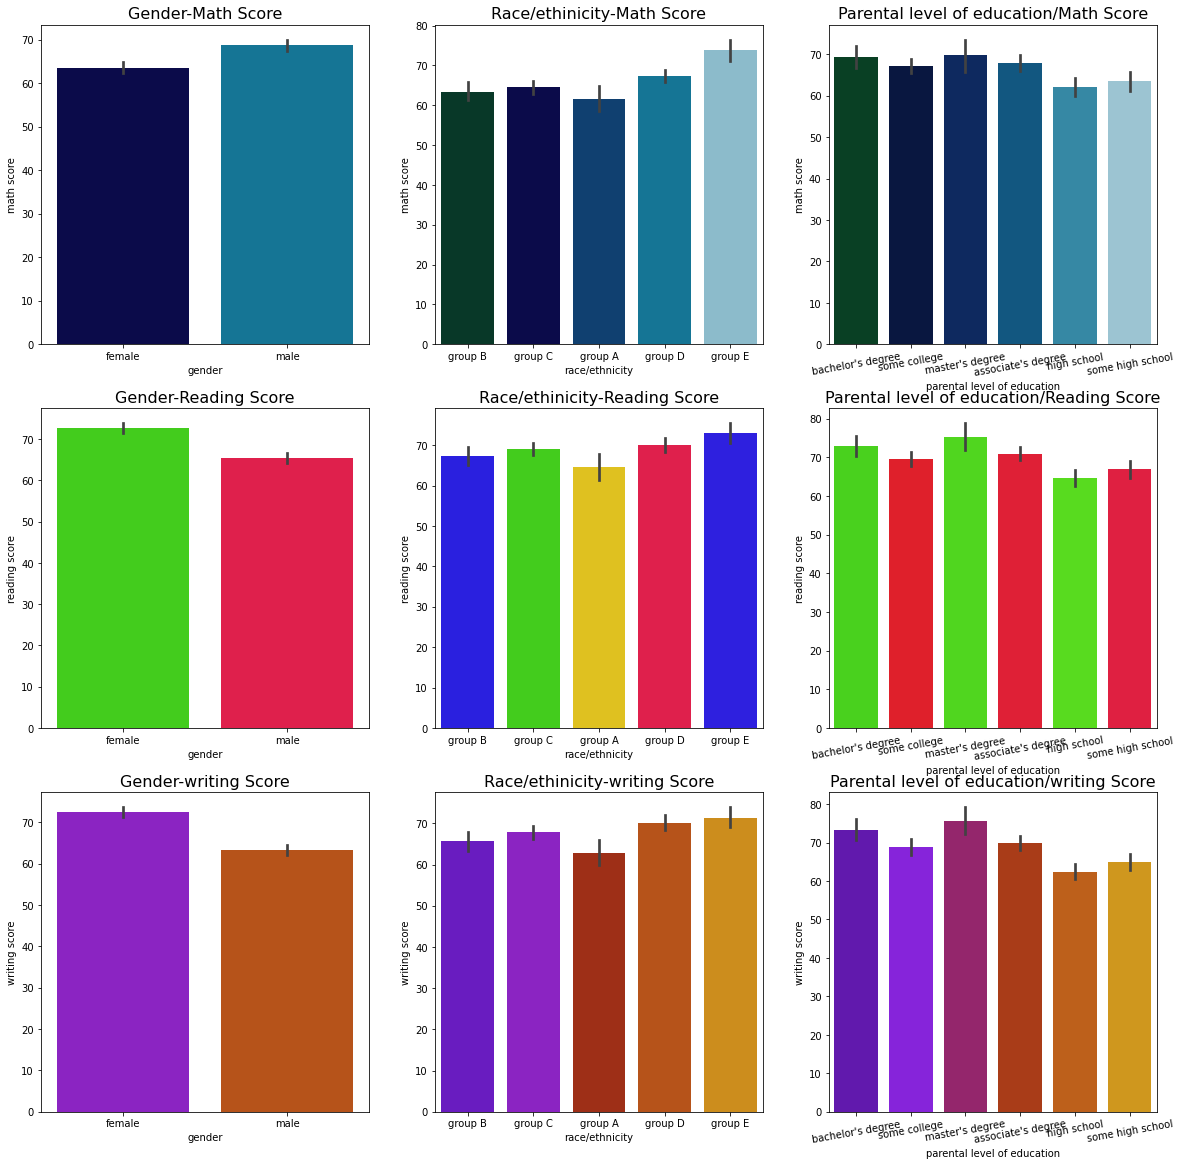

'\nGenel olarak bakıldığında farkları az olsa da kadınların yazma ve okuma skorları daha iyi iken matematikte erkeklerin daha iyi \nolduğu görülüyor. \nKökene bakıldığı zaman ise üç ders grubunda da farklı grupların  skorları etkilediği görülüyor. \nYine üç grupta da ebebeynlerin eğitim durumunun öğrencilerin başarısını etkilediği gözlemlenmekte. \n'

In [155]:
"""
Genel olarak bakıldığında farkları az olsa da kadınların yazma ve okuma skorları daha iyi iken matematikte erkeklerin daha iyi 
olduğu görülüyor. 
Kökene bakıldığı zaman ise üç ders grubunda da farklı grupların  skorları etkilediği görülüyor. 
Yine üç grupta da ebebeynlerin eğitim durumunun öğrencilerin başarısını etkilediği gözlemlenmekte. 
"""


plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.barplot(studentPerformance["gender"],studentPerformance["math score"],palette = 'ocean')
plt.title("Gender-Math Score",fontsize=16)

plt.subplot(3,3,2)
sns.barplot(studentPerformance["race/ethnicity"],studentPerformance["math score"],palette = 'ocean')
plt.title("Race/ethinicity-Math Score",fontsize=16)

plt.subplot(3,3,3)
sns.barplot(studentPerformance["parental level of education"],studentPerformance["math score"],palette = 'ocean')
plt.title("Parental level of education/Math Score",fontsize=16)
plt.xticks(rotation = 10)

plt.subplot(3,3,4)
sns.barplot(studentPerformance["gender"],studentPerformance["reading score"],palette="prism")
plt.title("Gender-Reading Score",fontsize=16)

plt.subplot(3,3,5)
sns.barplot(studentPerformance["race/ethnicity"],studentPerformance["reading score"],palette="prism")
plt.title("Race/ethinicity-Reading Score",fontsize=16)

plt.subplot(3,3,6)
sns.barplot(studentPerformance["parental level of education"],studentPerformance["reading score"],palette="prism")
plt.title("Parental level of education/Reading Score",fontsize=16)
plt.xticks(rotation = 10)

plt.subplot(3,3,7)
sns.barplot(studentPerformance["gender"],studentPerformance["writing score"],palette="gnuplot")
plt.title("Gender-writing Score",fontsize=16)

plt.subplot(3,3,8)
sns.barplot(studentPerformance["race/ethnicity"],studentPerformance["writing score"],palette="gnuplot")
plt.title("Race/ethinicity-writing Score",fontsize=16)

plt.subplot(3,3,9)
sns.barplot(studentPerformance["parental level of education"],studentPerformance["writing score"],palette="gnuplot")
plt.title("Parental level of education/writing Score",fontsize=16)
plt.xticks(rotation = 10)

plt.show()



2-Does lunch type have a relationship with exam performances? How can you explain this, if any?
 

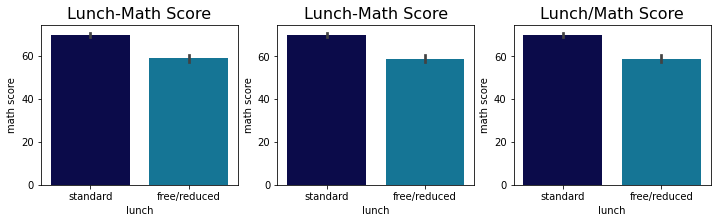

In [156]:
"""Bar plot ve T istatistiği ile aralarındaki ilişki açıklanabilir"""
plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.barplot(studentPerformance["lunch"],studentPerformance["math score"],palette = 'ocean')
plt.title("Lunch-Math Score",fontsize=16)

plt.subplot(3,3,2)
sns.barplot(studentPerformance["lunch"],studentPerformance["math score"],palette = 'ocean')
plt.title("Lunch-Math Score",fontsize=16)

plt.subplot(3,3,3)
sns.barplot(studentPerformance["lunch"],studentPerformance["math score"],palette = 'ocean')
plt.title("Lunch/Math Score",fontsize=16)

plt.show()  

In [157]:
"""P değerlerinin  0.05 anlam düzeyinin altında olduğu için aralarında ilişki olduğu kanısına varılır
Aynı zaman da T değerleri 2'den bayağı büyük olduğu için aralarında ilişki vardır diyebiliriz.
"""

studentPerformance.dropna(inplace=True)
stPerfUnique = studentPerformance["lunch"].unique()
stPerfLunch = studentPerformance.groupby("lunch")



pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(stPerfUnique)):
        for j in range(i+1, len(stPerfUnique)):
            ttest = stats.ttest_ind(studentPerformance[studentPerformance["lunch"]==stPerfUnique[i]][var], 
                                studentPerformance[studentPerformance["lunch"]==stPerfUnique[j]][var])
            group_1 = stPerfUnique[i]
            group_2 = stPerfUnique[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.837180472914612,0.000000000000000


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.451056467473455,0.000000000000200


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.009784197834758,0.000000000000003


3-Does the preparation courses have an impact on exam performance?


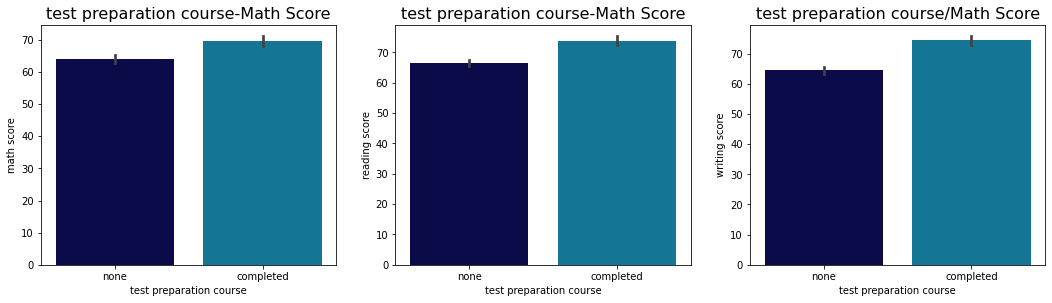

In [158]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
sns.barplot(studentPerformance["test preparation course"],studentPerformance["math score"],palette = 'ocean')
plt.title("test preparation course-Math Score",fontsize=16)

plt.subplot(3,3,2)
sns.barplot(studentPerformance["test preparation course"],studentPerformance["reading score"],palette = 'ocean')
plt.title("test preparation course-Math Score",fontsize=16)

plt.subplot(3,3,3)
sns.barplot(studentPerformance["test preparation course"],studentPerformance["writing score"],palette = 'ocean')
plt.title("test preparation course/Math Score",fontsize=16)

plt.show()

In [159]:
"""P değerlerine bakıldığında %95 güven aralığında 0.05 anlam düzeyinden düşük olduğu için aralarında ilişki vardır denilir.
"""

studentPerformance.dropna(inplace=True)
stPerfUnique = studentPerformance["test preparation course"].unique()

pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(stPerfUnique)):
        for j in range(i+1, len(stPerfUnique)):
            ttest = stats.ttest_ind(studentPerformance[studentPerformance["test preparation course"]==stPerfUnique[i]][var], 
                                studentPerformance[studentPerformance["test preparation course"]==stPerfUnique[j]][var])
            group_1 = stPerfUnique[i]
            group_2 = stPerfUnique[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score

,group_1,group_2,statistic,p_value
0,none,completed,-5.704616417349102,0.000000015359135


For the sake of comparison reading score

,group_1,group_2,statistic,p_value
0,none,completed,-7.871663538941468,0.000000000000009


For the sake of comparison writing score

,group_1,group_2,statistic,p_value
0,none,completed,-10.409173436808748,0.000000000000000


4-Which lessons are most correlated with each other?

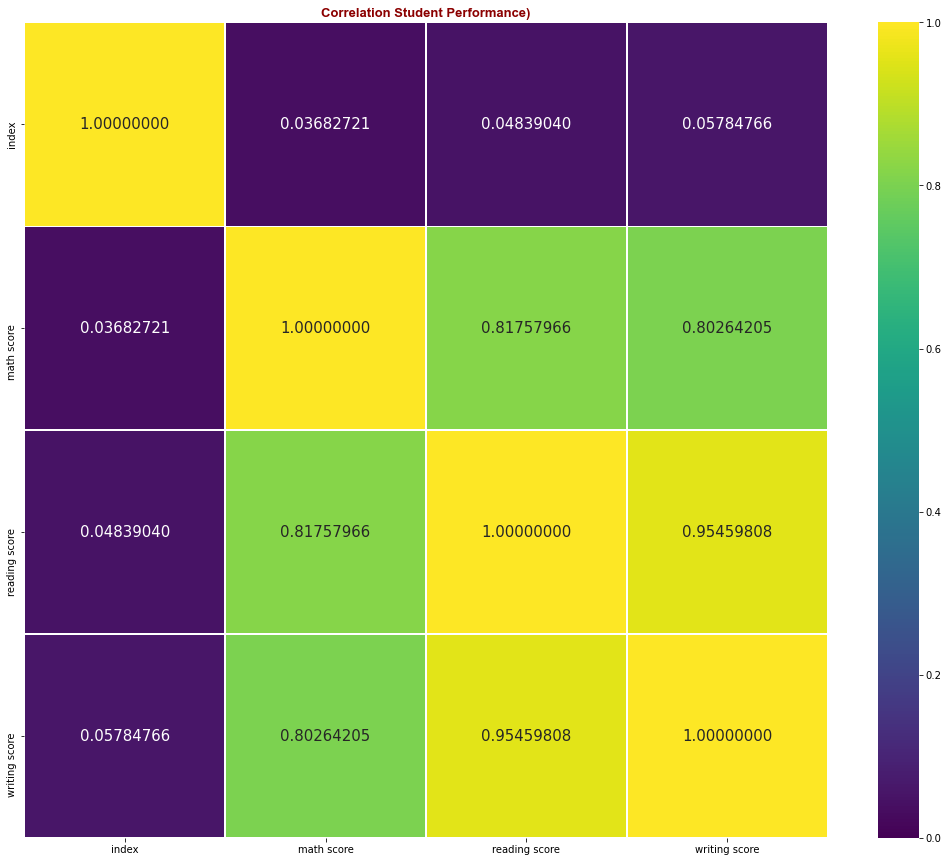

In [160]:
"""Birbiriyle en korale olan en yüksek korelasyon katsayısına sahip değişkenlerdir. 
Tabloda en yüksek ilişkiye sahip değişkenler writing ve reading'tir.
"""


plt.figure(figsize=(18,15))
studPerf = studentPerformance.corr()
sns.heatmap(studPerf, annot=True, fmt='.8f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Student Performance)", fontdict=title_font)

plt.show()
